Импорты и стиль

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Оформление графиков в том же стиле
sns.set_theme(
    style="whitegrid",
    palette="flare",
    rc={
        "figure.figsize": (8,6),
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12
    }
)
# cmap для heatmap
diverging_cmap = sns.diverging_palette(220, 20, as_cmap=True)

Загрузка предобработанных данных

In [6]:
df = pd.read_csv('../data/processed/heart_preprocessed.csv')
print("Размер данных:", df.shape)

Размер данных: (302, 23)


Heatmap корреляционной матрицы

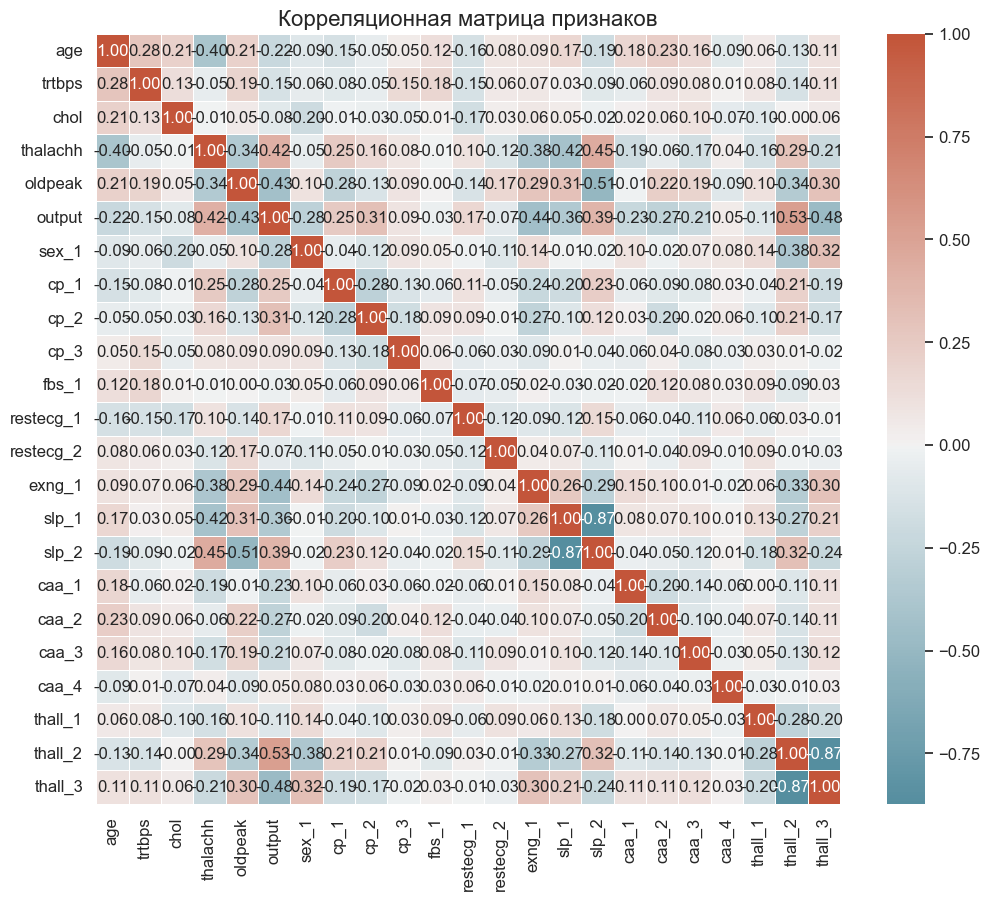

In [9]:
# Вычисляем корреляции
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    cmap=diverging_cmap,
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Корреляционная матрица признаков")
plt.show()

Scatter-plots для топ-коррелирующих признаков

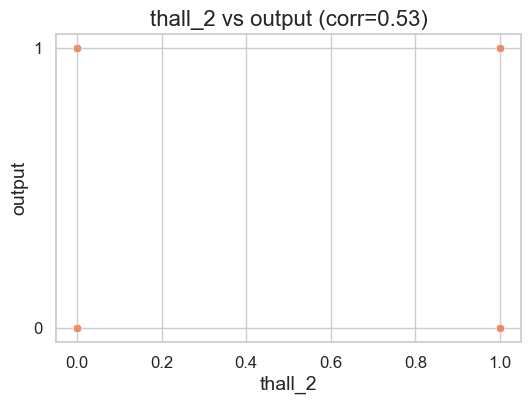

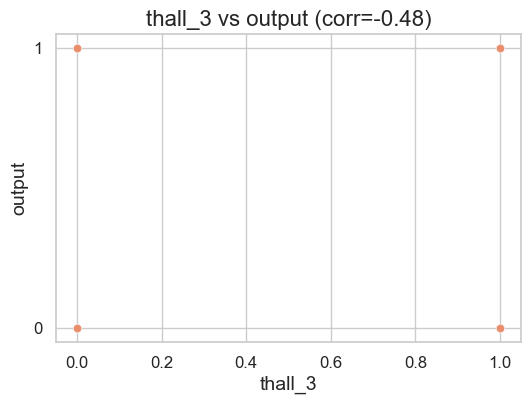

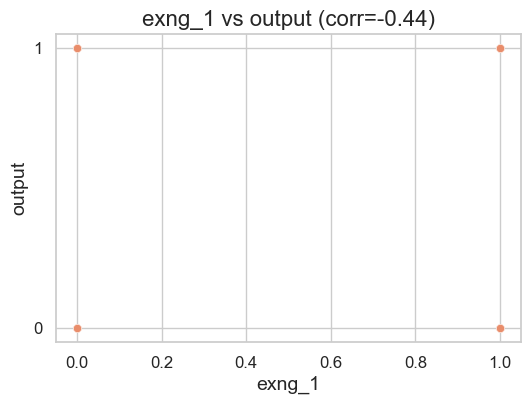

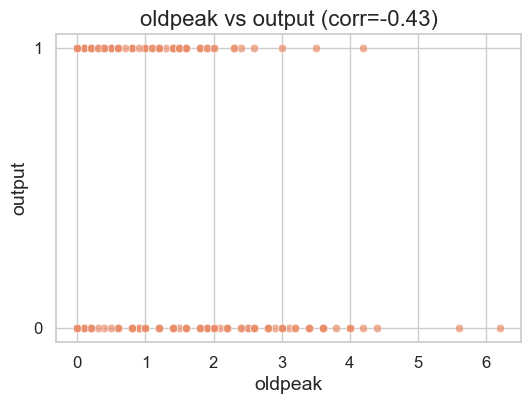

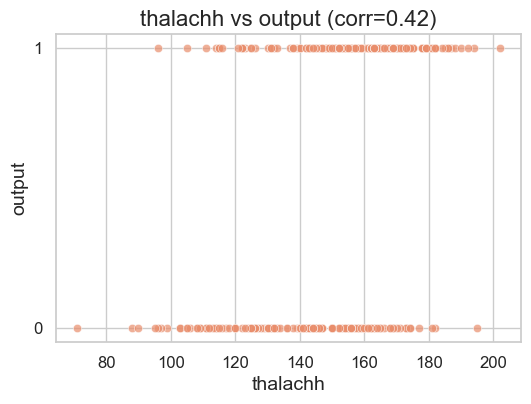

In [17]:
# 1) Берём топ-5 по модулю корреляции, сохраняя знак
strong_feats = corr['output'].abs().sort_values(ascending=False).head(6).index.drop('output')

# 2) Строим по очереди
for feat in strong_feats:
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        x=df[feat],
        y=df['output'],
        alpha=0.7
    )
    plt.title(f'{feat} vs output (corr={corr.loc[feat, "output"]:.2f})')
    plt.xlabel(feat)
    plt.ylabel('output')
    plt.yticks([0,1])
    plt.show()

    plt.show()